In [4]:
# --- Imports ---
import pandas as pd
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Make Seaborn look nicer by default
sns.set(style="whitegrid", context="talk")

# --- Paths ---
BASE_DIR = Path("..") / "data"   # since notebook is inside notebooks/
streaming_path = BASE_DIR / "streaming-history"
account_path = BASE_DIR / "account-data"

# --- Load Streaming History ---
# Picks up audio + video files like "Streaming_History_Audio_2021-2023_0.json"
streaming_files = list(streaming_path.glob("Streaming_History*.json"))
print(f"Found {len(streaming_files)} streaming files")

# Read & combine
dfs = [pd.read_json(f) for f in streaming_files]
streaming_df = pd.concat(dfs, ignore_index=True)

# Clean columns
streaming_df["ts"] = pd.to_datetime(streaming_df["ts"])
streaming_df["minutes_played"] = streaming_df["ms_played"] / 60000

print("Streaming history loaded:", streaming_df.shape)
display(streaming_df.head())

# --- Helper function for safe JSON loading ---
def safe_load_json(path):
    """Try to load JSON with pandas, else return empty DataFrame."""
    try:
        return pd.read_json(path)
    except Exception as e:
        print(f"Could not load {path.name}: {e}")
        return pd.DataFrame()
# --- Load Account Data ---
# --- Load YourLibrary.json safely ---
library_file = account_path / "YourLibrary.json"
if library_file.exists():
    try:
        with open(library_file, "r", encoding="utf-8") as f:
            library_json = json.load(f)
        # Check what the structure looks like
        print("YourLibrary.json keys:", 
              library_json.keys() if isinstance(library_json, dict) else type(library_json))
        
        # If it’s a list of items, normalize into a DataFrame
        if isinstance(library_json, list):
            library = pd.json_normalize(library_json)
        elif isinstance(library_json, dict):
            # Sometimes it's nested under a key like "tracks"
            for key in library_json.keys():
                if isinstance(library_json[key], list):
                    library = pd.json_normalize(library_json[key])
                    break
            else:
                library = pd.DataFrame([library_json])  # fallback
        else:
            library = pd.DataFrame()
    except Exception as e:
        print("Could not parse YourLibrary.json:", e)
        library = pd.DataFrame()
else:
    library = pd.DataFrame()
    print("YourLibrary.json not found")

searches = safe_load_json(account_path / "SearchQueries.json")

playlist_files = list(account_path.glob("Playlist*.json"))
playlist_dfs = [safe_load_json(f) for f in playlist_files]
playlists = pd.concat(playlist_dfs, ignore_index=True) if playlist_dfs else pd.DataFrame()


Found 4 streaming files
Streaming history loaded: (33766, 24)


,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,minutes_played
0,2021-08-02 08:07:13+00:00,"Android OS 11 API 30 (samsung, SM-A315G)",84209,KE,197.237.199.160,jeniffer Auma,George Ramogi,George Ramogi,spotify:track:7tkYASBMb0Kl5ttl0D751f,None,...,NaN,NaN,playbtn,fwdbtn,False,False,0.0,NaN,False,1.403483
1,2021-08-02 08:07:15+00:00,"Android OS 11 API 30 (samsung, SM-A315G)",1686,KE,197.237.199.160,Juste un peu d'amour decastro,Madilu System,Bonheur,spotify:track:5laucHqRZXvgVrH2lXsd9C,None,...,NaN,NaN,fwdbtn,fwdbtn,False,False,0.0,NaN,False,0.028100
2,2021-08-02 08:07:16+00:00,"Android OS 11 API 30 (samsung, SM-A315G)",743,KE,197.237.199.160,Cheche Jaseme,George Ramogi,Ajali Ya Sondu,spotify:track:1LVSDI9wyPDVHuyZlAUhXg,None,...,NaN,NaN,fwdbtn,fwdbtn,False,False,0.0,NaN,False,0.012383
3,2021-08-02 08:24:32+00:00,"Android OS 11 API 30 (samsung, SM-A315G)",545020,KE,197.237.199.160,Eswi yo wapi,Mbilia Bel,Eswi yo wapi,spotify:track:3LojeOSmqK8p72gR5oce7U,None,...,NaN,NaN,fwdbtn,trackdone,False,False,0.0,NaN,False,9.083667
4,2021-08-02 08:29:38+00:00,"Android OS 11 API 30 (samsung, SM-A315G)",306259,KE,197.237.199.160,Ajali Ya Sondu,George Ramogi,Ajali Ya Sondu,spotify:track:31ebX7y7zlz55m06JJy0Yl,None,...,NaN,NaN,trackdone,trackdone,False,False,0.0,NaN,False,5.104317


YourLibrary.json keys: dict_keys(['tracks', 'albums', 'shows', 'episodes', 'bannedTracks', 'artists', 'bannedArtists', 'other'])


In [5]:
print(streaming_df.columns)
display(streaming_df.head())
display(library.head())
display(searches.head())
display(playlists.head())



Index(['ts', 'platform', 'ms_played', 'conn_country', 'ip_addr',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'audiobook_title',
       'audiobook_uri', 'audiobook_chapter_uri', 'audiobook_chapter_title',
       'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline',
       'offline_timestamp', 'incognito_mode', 'minutes_played'],
      dtype='object')


,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,minutes_played
0,2021-08-02 08:07:13+00:00,"Android OS 11 API 30 (samsung, SM-A315G)",84209,KE,197.237.199.160,jeniffer Auma,George Ramogi,George Ramogi,spotify:track:7tkYASBMb0Kl5ttl0D751f,None,...,NaN,NaN,playbtn,fwdbtn,False,False,0.0,NaN,False,1.403483
1,2021-08-02 08:07:15+00:00,"Android OS 11 API 30 (samsung, SM-A315G)",1686,KE,197.237.199.160,Juste un peu d'amour decastro,Madilu System,Bonheur,spotify:track:5laucHqRZXvgVrH2lXsd9C,None,...,NaN,NaN,fwdbtn,fwdbtn,False,False,0.0,NaN,False,0.028100
2,2021-08-02 08:07:16+00:00,"Android OS 11 API 30 (samsung, SM-A315G)",743,KE,197.237.199.160,Cheche Jaseme,George Ramogi,Ajali Ya Sondu,spotify:track:1LVSDI9wyPDVHuyZlAUhXg,None,...,NaN,NaN,fwdbtn,fwdbtn,False,False,0.0,NaN,False,0.012383
3,2021-08-02 08:24:32+00:00,"Android OS 11 API 30 (samsung, SM-A315G)",545020,KE,197.237.199.160,Eswi yo wapi,Mbilia Bel,Eswi yo wapi,spotify:track:3LojeOSmqK8p72gR5oce7U,None,...,NaN,NaN,fwdbtn,trackdone,False,False,0.0,NaN,False,9.083667
4,2021-08-02 08:29:38+00:00,"Android OS 11 API 30 (samsung, SM-A315G)",306259,KE,197.237.199.160,Ajali Ya Sondu,George Ramogi,Ajali Ya Sondu,spotify:track:31ebX7y7zlz55m06JJy0Yl,None,...,NaN,NaN,trackdone,trackdone,False,False,0.0,NaN,False,5.104317


,artist,album,track,uri
0,Nviiri The Storyteller,Nikita,Nikita,spotify:track:7giomsoZgEbXFNTqS8Y683
1,Wanavokali,Rhumba,Rhumba,spotify:track:3bO7d1nr8H3Cbb2uYpAAcI
2,Sanaipei Tande,Amina,Amina,spotify:track:36XzkxPyKdQm7d1qHrKRVd
3,Kenge Kenge,Introducing Kenge Kenge,Kenge Kenge,spotify:track:2B1XM6ZFNiZOneVvI7of9D
4,Willy Paul,Tam Tam - Single,Tam Tam,spotify:track:2fuYnLFLB2ksbXnoGFPFt5


,platform,searchTime,searchQuery,searchInteractionURIs
0,ANDROID_ARM,2025-06-10T04:49:13.348Z[UTC],sle,[]
1,ANDROID,2025-06-10T04:49:13.549Z[UTC],slee,[spotify:show:1NUbfl24dTruZSMDfLq24Y]
2,ANDROID,2025-06-20T08:49:34.153Z[UTC],fadhil,[]
3,ANDROID,2025-06-20T08:49:43.442Z[UTC],mshuku,[spotify:track:1LICKYsJTOdzCkZLHwmXh9]
4,ANDROID,2025-06-21T12:15:41.017Z[UTC],mshuku,[]


,playlists
0,"{'name': '17/08/2024', 'lastModifiedDate': '20..."
1,"{'name': 'Lights out', 'lastModifiedDate': '20..."
2,"{'name': 'Rhumba, Lingala and Soukous', 'lastM..."
3,"{'name': 'Luo Gospel', 'lastModifiedDate': '20..."
4,"{'name': 'Piano and Classical', 'lastModifiedD..."


In [7]:
print(streaming_df.columns)


Index(['ts', 'platform', 'ms_played', 'conn_country', 'ip_addr',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'audiobook_title',
       'audiobook_uri', 'audiobook_chapter_uri', 'audiobook_chapter_title',
       'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline',
       'offline_timestamp', 'incognito_mode', 'minutes_played'],
      dtype='object')


In [8]:
# Top audio tracks by minutes played
top_audio_tracks = streaming_df.groupby("master_metadata_track_name")["minutes_played"].sum().sort_values(ascending=False).head(10)
top_audio_tracks

# Top artists by minutes played
top_artists = streaming_df.groupby("master_metadata_album_artist_name")["minutes_played"].sum().sort_values(ascending=False).head(10)
top_artists

# Total minutes played
print("Total minutes played:", streaming_df["minutes_played"].sum())


Total minutes played: 154282.68325


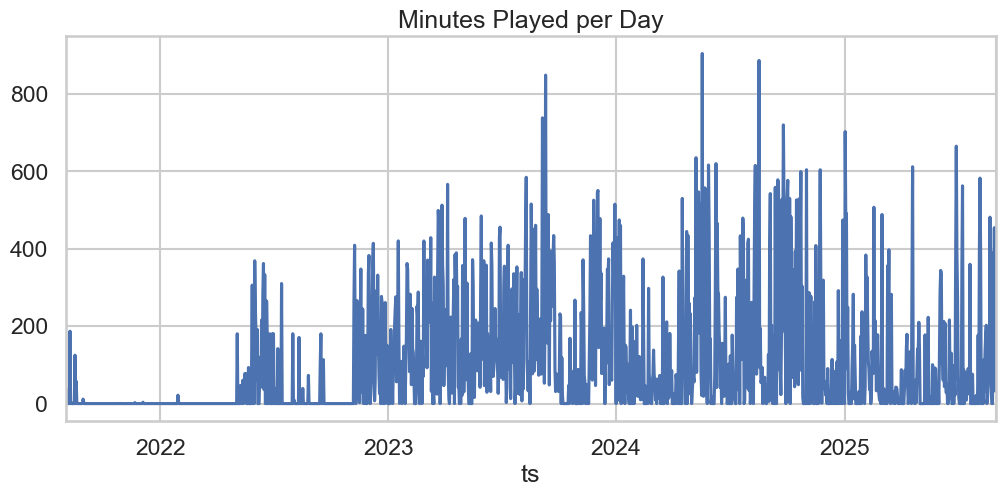

In [9]:
streaming_df.set_index("ts", inplace=True)
streaming_df.resample("D")["minutes_played"].sum().plot(figsize=(12,5))
plt.title("Minutes Played per Day")
plt.show()


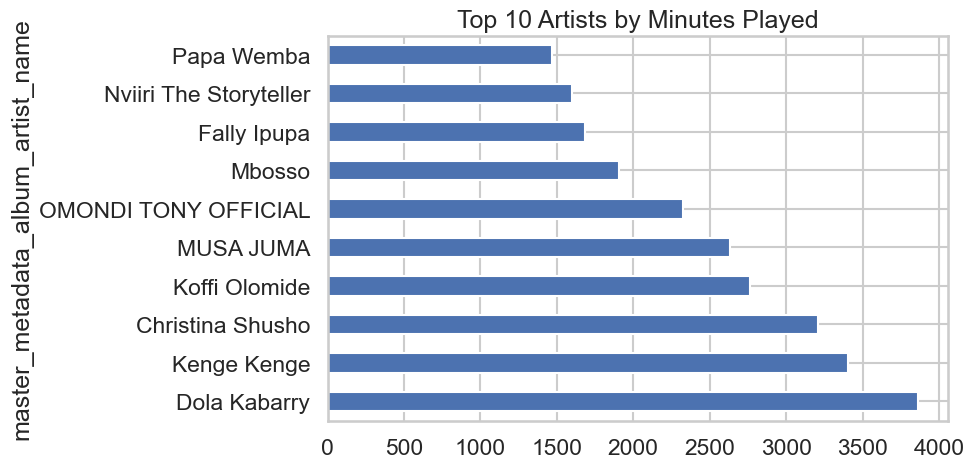

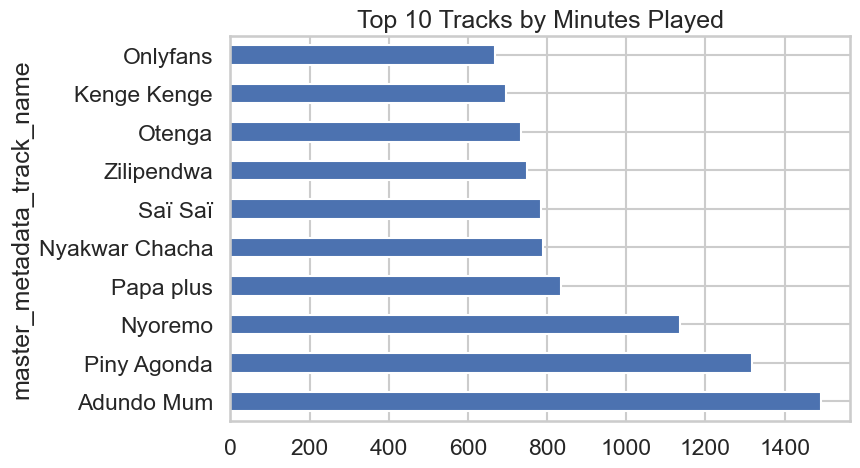

In [11]:
# Top 10 artists by minutes played
top_artists = streaming_df.groupby("master_metadata_album_artist_name")["minutes_played"].sum().sort_values(ascending=False).head(10)
top_artists.plot(kind="barh", figsize=(8,5))
plt.title("Top 10 Artists by Minutes Played")
plt.show()

# Top 10 tracks by minutes played
top_tracks = streaming_df.groupby("master_metadata_track_name")["minutes_played"].sum().sort_values(ascending=False).head(10)
top_tracks.plot(kind="barh", figsize=(8,5))
plt.title("Top 10 Tracks by Minutes Played")
plt.show()


In [12]:
print(playlists.columns)
display(playlists.head())


Index(['playlists'], dtype='object')


,playlists
0,"{'name': '17/08/2024', 'lastModifiedDate': '20..."
1,"{'name': 'Lights out', 'lastModifiedDate': '20..."
2,"{'name': 'Rhumba, Lingala and Soukous', 'lastM..."
3,"{'name': 'Luo Gospel', 'lastModifiedDate': '20..."
4,"{'name': 'Piano and Classical', 'lastModifiedD..."


In [13]:
# Expand the nested 'playlists' column
playlists_expanded = pd.json_normalize(playlists["playlists"].explode())
display(playlists_expanded.head())
print(playlists_expanded.columns)


""
0
1
2
3
4


Index([], dtype='object')


In [14]:
# Look at the first playlist row to see the keys
import json

print(json.dumps(playlists["playlists"].iloc[0], indent=2))


{
  "name": "17/08/2024",
  "lastModifiedDate": "2024-08-17",
  "collaborators": [
    "<anonymous-user>",
    "<anonymous-user>",
    "Naomi Chatfield-Smith",
    "seaandsunny"
  ],
  "items": [
    {
      "track": {
        "trackName": "Thank You For The Music",
        "artistName": "ABBA",
        "albumName": "The Album",
        "trackUri": "spotify:track:08GOw3NsrJ0LsCCeyqzt3b"
      },
      "episode": null,
      "audiobook": null,
      "localTrack": null,
      "addedDate": "2024-08-17"
    },
    {
      "track": {
        "trackName": "360",
        "artistName": "Charli xcx",
        "albumName": "BRAT",
        "trackUri": "spotify:track:4w2GLmK2wnioVnb5CPQeex"
      },
      "episode": null,
      "audiobook": null,
      "localTrack": null,
      "addedDate": "2024-08-17"
    },
    {
      "track": {
        "trackName": "Club classics",
        "artistName": "Charli xcx",
        "albumName": "BRAT",
        "trackUri": "spotify:track:0CySZwyRJ0vyUqtSjM9i2k"
      

In [15]:
# Explode the items column for all playlists
playlist_tracks = playlists["playlists"].explode()  # each row = one playlist

# Now normalize the 'items' inside each playlist
all_tracks = pd.json_normalize(
    playlist_tracks,
    record_path="items",
    meta=["name", "lastModifiedDate", "collaborators"],
    errors="ignore"
)

# Flatten the 'track' dictionary
track_info = pd.json_normalize(all_tracks["track"])
all_tracks = pd.concat([all_tracks.drop(columns=["track"]), track_info], axis=1)

# Display results
display(all_tracks.head())
print(all_tracks.columns)


TypeError: string indices must be integers, not 'str'

In [16]:
import pandas as pd

# Convert each playlist row to a dict if it isn't already
playlist_dicts = [p if isinstance(p, dict) else {} for p in playlists["playlists"]]

# Create a new DataFrame from these dicts
playlist_df = pd.DataFrame(playlist_dicts)

# Explode the 'items' column so each track is its own row
playlist_items = playlist_df.explode("items")

# Normalize the 'track' column inside each item
track_info = pd.json_normalize(playlist_items["items"].dropna().apply(lambda x: x.get("track", {})))

# Combine with playlist-level info (name, lastModifiedDate, collaborators)
all_tracks = pd.concat(
    [playlist_items[["name", "lastModifiedDate", "collaborators"]].reset_index(drop=True), track_info.reset_index(drop=True)],
    axis=1
)

display(all_tracks.head())
print(all_tracks.columns)


,name,lastModifiedDate,collaborators,trackName,artistName,albumName,trackUri
0,17/08/2024,2024-08-17,"[<anonymous-user>, <anonymous-user>, Naomi Cha...",Thank You For The Music,ABBA,The Album,spotify:track:08GOw3NsrJ0LsCCeyqzt3b
1,17/08/2024,2024-08-17,"[<anonymous-user>, <anonymous-user>, Naomi Cha...",360,Charli xcx,BRAT,spotify:track:4w2GLmK2wnioVnb5CPQeex
2,17/08/2024,2024-08-17,"[<anonymous-user>, <anonymous-user>, Naomi Cha...",Club classics,Charli xcx,BRAT,spotify:track:0CySZwyRJ0vyUqtSjM9i2k
3,17/08/2024,2024-08-17,"[<anonymous-user>, <anonymous-user>, Naomi Cha...",Sympathy is a knife,Charli xcx,BRAT,spotify:track:5c9tBmJKbTdn1vhzXHeAwW
4,17/08/2024,2024-08-17,"[<anonymous-user>, <anonymous-user>, Naomi Cha...",Talk talk,Charli xcx,BRAT,spotify:track:62fqMvguJbsSs9HKhhRfuS


Index(['name', 'lastModifiedDate', 'collaborators', 'trackName', 'artistName',
       'albumName', 'trackUri'],
      dtype='object')


You have 14 playlists containing 2082 tracks in total.

Top 5 biggest playlists:


name
Luo Gospel                     406
Rhumba, Lingala and Soukous    337
Barbie 💖                       261
Let's make love tonight ❤️     220
Piano and Classical            155
dtype: int64

Top 10 artists in playlists:


artistName
Nicki Minaj                   180
Koffi Olomide                  88
Max Kogai Jnr                  64
Fally Ipupa                    45
Mourine Awuor Nyajerusalem     31
John Okidi                     30
Madilu System                  26
Pauline Akoth Nyaimbo          25
Elijah Jalogo                  25
MUSA JUMA                      24
dtype: int64

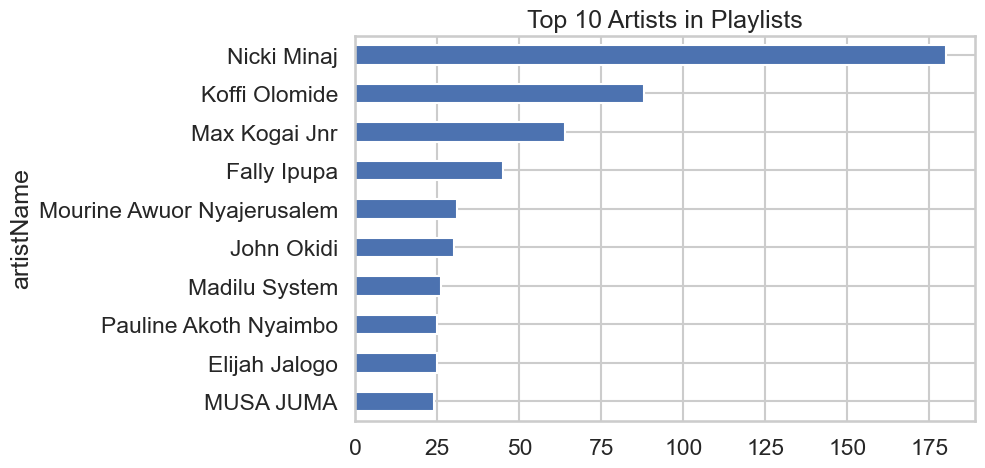

Top 10 tracks in playlists:


trackName
One More Night                                                                   4
Earned It (Fifty Shades Of Grey) - From The "Fifty Shades Of Grey" Soundtrack    3
Mario                                                                            3
Iwinjori                                                                         3
Colonisation                                                                     3
Otelona                                                                          3
Pound The Alarm                                                                  3
Often                                                                            3
Birthday Sex                                                                     3
Super Bass                                                                       3
dtype: int64

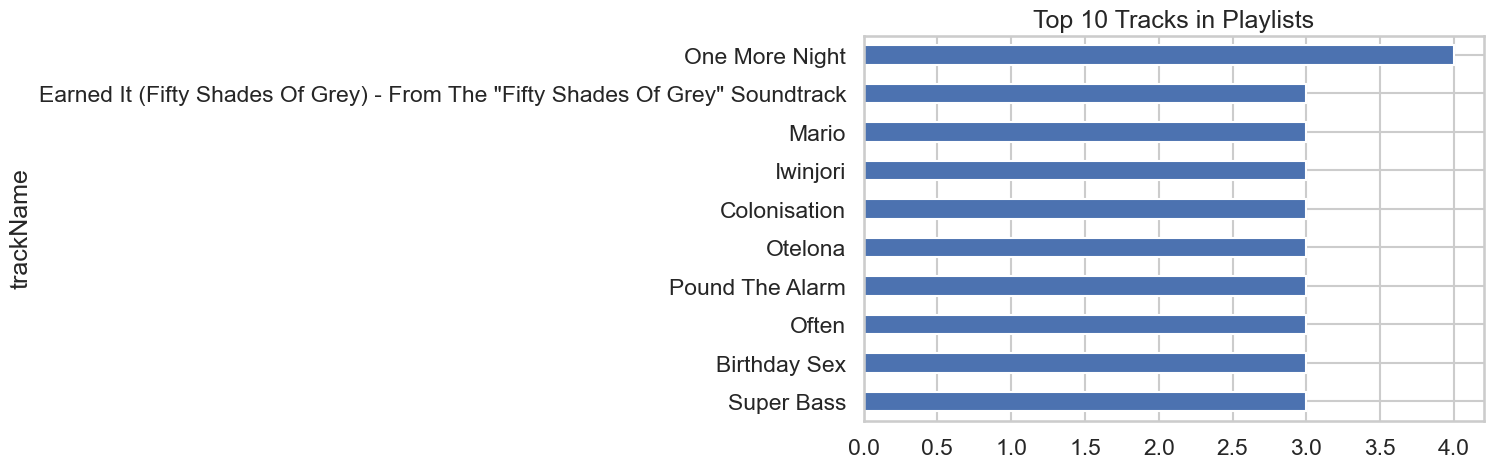

In [17]:
import matplotlib.pyplot as plt

# 1️⃣ Total playlists and total tracks
num_playlists = all_tracks['name'].nunique()
num_tracks = all_tracks.shape[0]
print(f"You have {num_playlists} playlists containing {num_tracks} tracks in total.\n")

# 2️⃣ Biggest playlists (by number of tracks)
playlist_sizes = all_tracks.groupby('name').size().sort_values(ascending=False)
print("Top 5 biggest playlists:")
display(playlist_sizes.head(5))

# 3️⃣ Top 10 artists across all playlists
top_artists = all_tracks.groupby('artistName').size().sort_values(ascending=False).head(10)
print("Top 10 artists in playlists:")
display(top_artists)
top_artists.plot(kind='barh', figsize=(8,5), title="Top 10 Artists in Playlists")
plt.gca().invert_yaxis()  # largest on top
plt.show()

# 4️⃣ Top 10 tracks across all playlists
top_tracks = all_tracks.groupby('trackName').size().sort_values(ascending=False).head(10)
print("Top 10 tracks in playlists:")
display(top_tracks)
top_tracks.plot(kind='barh', figsize=(8,5), title="Top 10 Tracks in Playlists")
plt.gca().invert_yaxis()
plt.show()


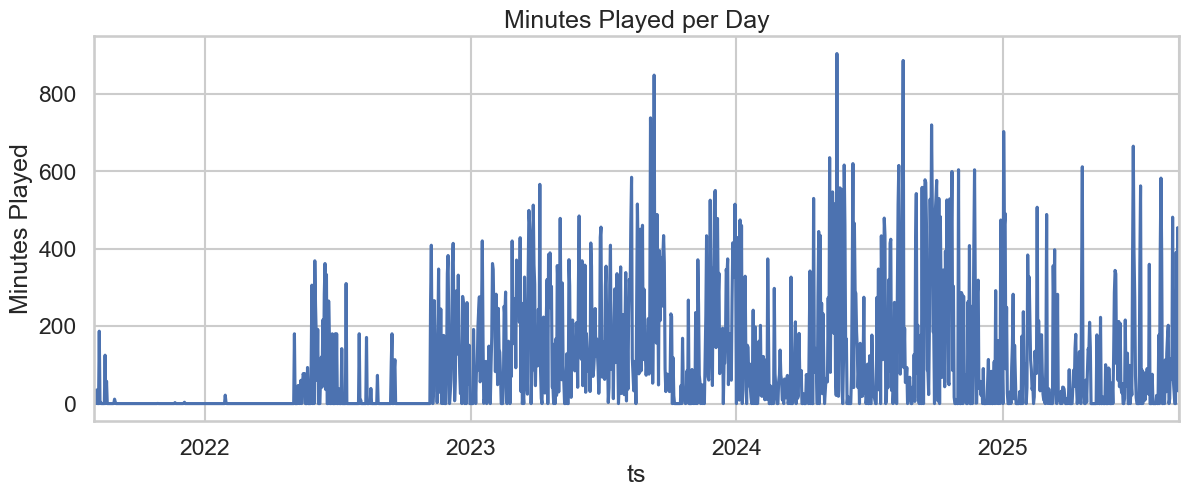

C:\Users\daisy\AppData\Local\Temp\ipykernel_7616\3627333040.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_minutes = streaming_df["minutes_played"].resample("M").sum()


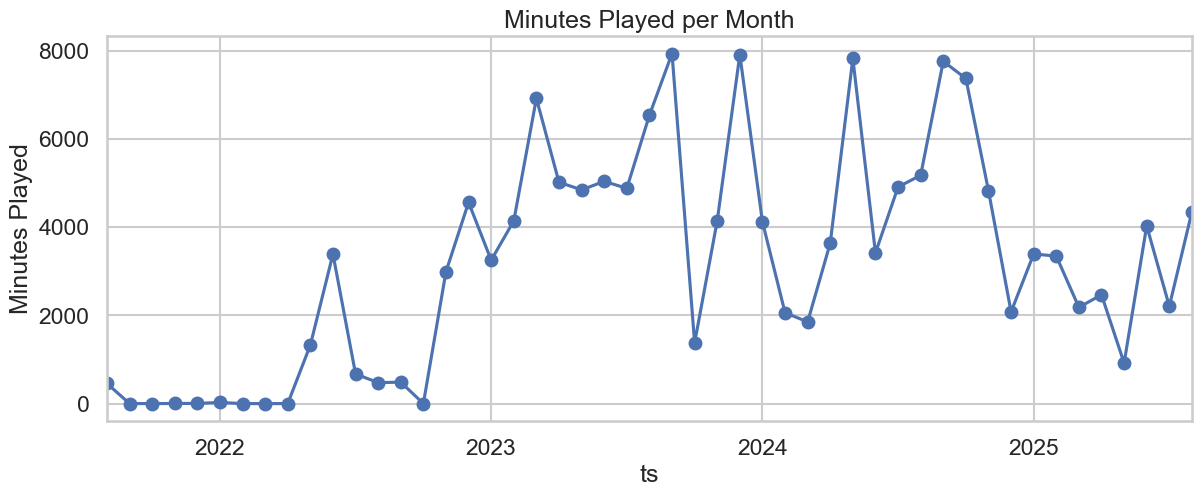

Top Podcasts:


episode_show_name
Down To Sleep (Audiobooks & Bedtime Stories)    35573.652900
Soothing Ambient Sounds                          6568.007367
Bedtime Bible Stories for Adults                 4742.895600
Comforting Sounds                                3225.678133
Audice Wellness Services                         2475.789567
Sleepy                                           1834.608000
The Sleepy Bookshelf                             1764.222517
ShxtsNGigs                                        985.152417
Murder, Mystery & Makeup                          655.169050
The Sleep Zone Podcast                            511.999967
Name: minutes_played, dtype: float64

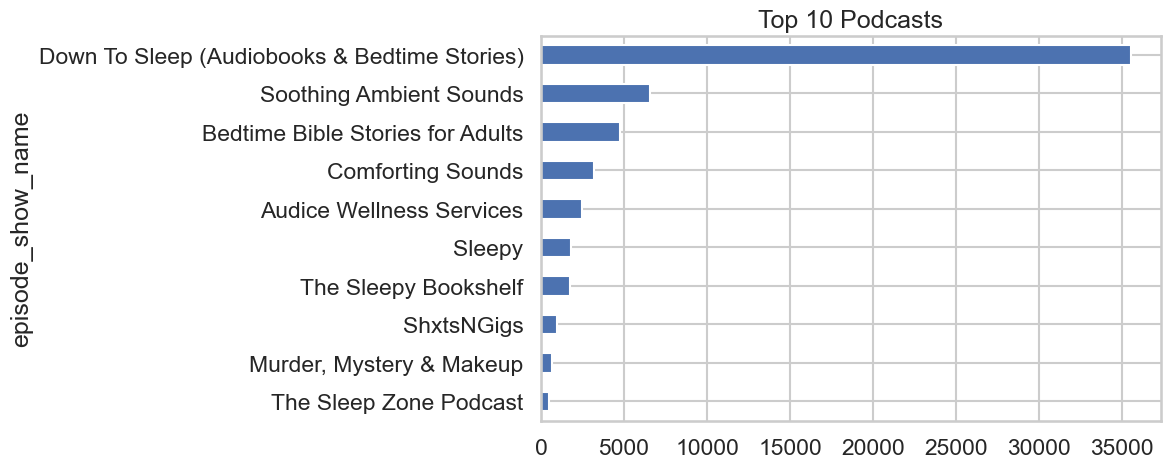

Top Audiobooks:


audiobook_title
The World According to Cunk                                596.276817
American Gods                                              476.425583
Mythos                                                     466.137250
The Ride of Her Life                                       271.583900
How to Kill Your Family: The #1 SUNDAY TIMES BESTSELLER    207.249400
The 12 Week Year                                           188.580817
Want                                                       160.689417
What Wendy Wants                                            41.419683
The 48 Laws of Power                                        16.889983
Girls That Invest                                            1.549583
Name: minutes_played, dtype: float64

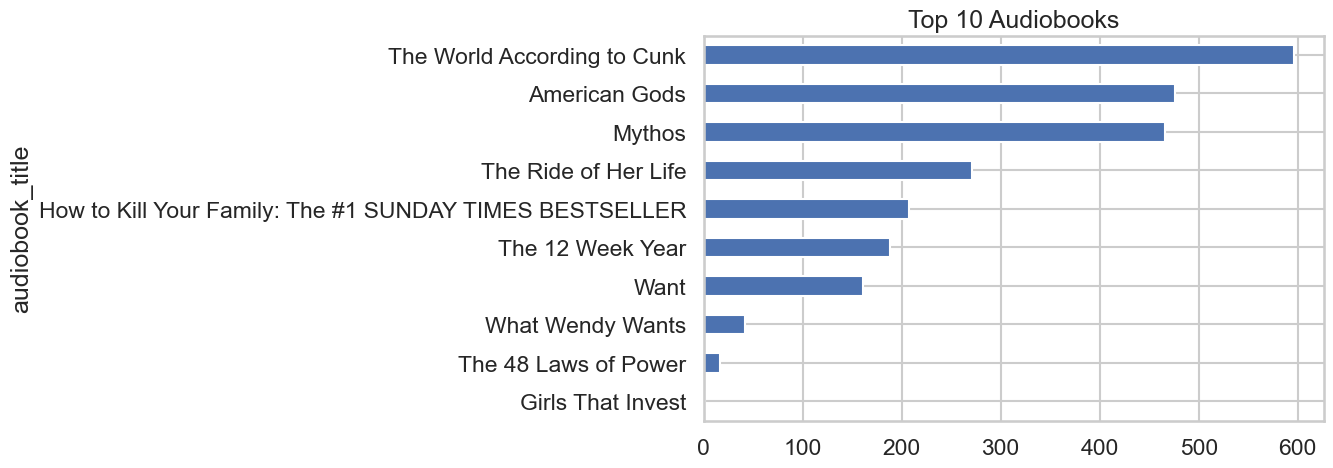

Top Search Queries:


searchQuery
e          4
yesu       3
yes        3
etat       3
nasema     2
nour e     2
yesy       2
etat m     2
etat       2
osipe      2
Name: count, dtype: int64

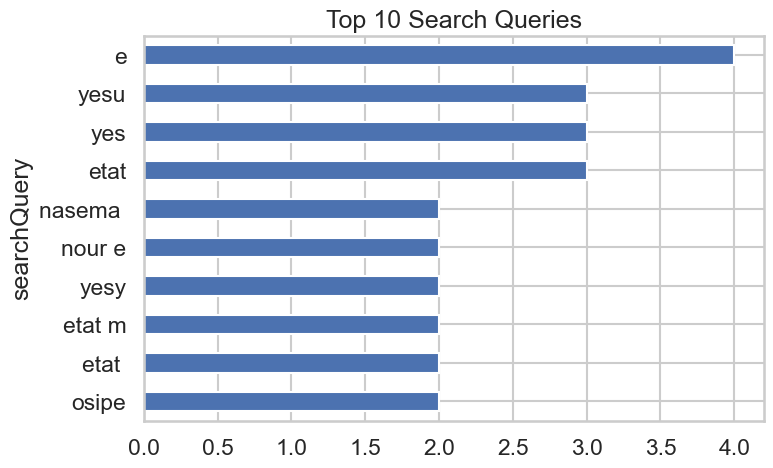

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

# Ensure 'ts' is datetime and set as index
if streaming_df.index.name != "ts":
    if "ts" in streaming_df.columns:
        streaming_df["ts"] = pd.to_datetime(streaming_df["ts"])
        streaming_df.set_index("ts", inplace=True)

# 1️⃣ Listening trends over time
if "minutes_played" in streaming_df.columns:
    daily_minutes = streaming_df["minutes_played"].resample("D").sum()
    if not daily_minutes.empty:
        plt.figure(figsize=(14,5))
        daily_minutes.plot(title="Minutes Played per Day")
        plt.ylabel("Minutes Played")
        plt.show()

    monthly_minutes = streaming_df["minutes_played"].resample("M").sum()
    if not monthly_minutes.empty:
        plt.figure(figsize=(14,5))
        monthly_minutes.plot(marker="o", title="Minutes Played per Month")
        plt.ylabel("Minutes Played")
        plt.show()
else:
    print("No 'minutes_played' column found.")

# 2️⃣ Podcasts
if "episode_show_name" in streaming_df.columns and streaming_df["episode_show_name"].notna().any():
    top_podcasts = streaming_df.groupby("episode_show_name")["minutes_played"].sum().sort_values(ascending=False).head(10)
    print("Top Podcasts:")
    display(top_podcasts)
    top_podcasts.plot(kind="barh", figsize=(8,5), title="Top 10 Podcasts")
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("No podcasts found in your streaming history.")

# 3️⃣ Audiobooks
if "audiobook_title" in streaming_df.columns and streaming_df["audiobook_title"].notna().any():
    top_audiobooks = streaming_df.groupby("audiobook_title")["minutes_played"].sum().sort_values(ascending=False).head(10)
    print("Top Audiobooks:")
    display(top_audiobooks)
    top_audiobooks.plot(kind="barh", figsize=(8,5), title="Top 10 Audiobooks")
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("No audiobooks found in your streaming history.")

# 4️⃣ Search queries
if not searches.empty and "searchQuery" in searches.columns:
    top_searches = searches["searchQuery"].value_counts().head(10)
    print("Top Search Queries:")
    display(top_searches)
    top_searches.plot(kind="barh", figsize=(8,5), title="Top 10 Search Queries")
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("No search queries found.")
